In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy import stats

In [3]:
beml_df = pd.read_csv(r"C:\Users\Mou\Desktop\finity\BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
beml_df = beml_df[['Date', 'Close']]

In [5]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [6]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [7]:
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


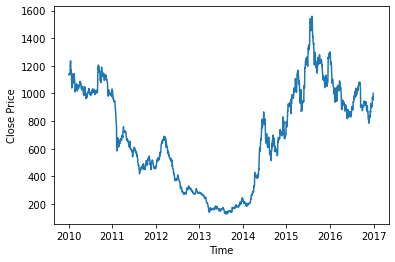

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

In [9]:
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [10]:
beml_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [11]:
#drop first row since it is NaN
beml_df = beml_df.dropna()

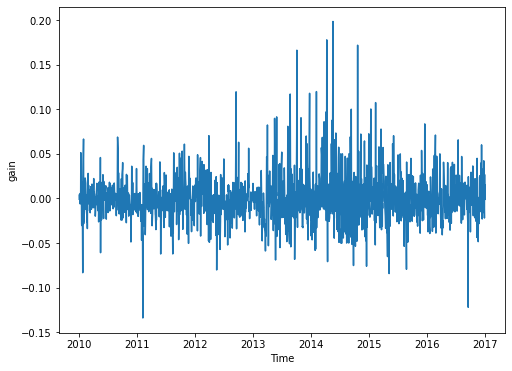

In [12]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(beml_df.index, beml_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

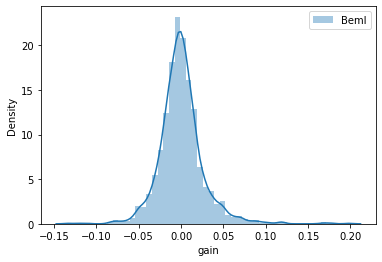

In [13]:
sn.distplot(beml_df.gain, label = 'Beml');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [14]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [15]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [16]:
beml_df_ci = stats.norm.interval(0.95,
loc = beml_df.gain.mean(),
scale = beml_df.gain.std())
print( 'Gain at 95% confidence interval is:', np.round(beml_df_ci, 4))

Gain at 95% confidence interval is: [-0.0515  0.0521]


In [17]:
from scipy import stats
stats.norm.ppf(.975)

1.959963984540054

In [18]:
stats.norm.interval(0.95,0,1)

(-1.959963984540054, 1.959963984540054)

In [19]:
beml_df_ci = stats.norm.interval(0.99,
loc = beml_df.gain.mean(),
scale = beml_df.gain.std())
print( 'Gain at 99% confidence interval is:', np.round(beml_df_ci, 4))

Gain at 99% confidence interval is: [-0.0678  0.0684]


In [20]:
from scipy import stats
stats.norm.ppf(.995)

2.5758293035489004

In [21]:
stats.norm.interval(0.99,0,1)

(-2.5758293035489004, 2.5758293035489004)